In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle


In [2]:
loan_dataset = pd.read_csv('loan_prediction.csv')

In [3]:
num_rows, num_columns = loan_dataset.shape
print("Number of rows in the dataset:", num_rows)
print("Number of columns in the dataset:", num_columns)

Number of rows in the dataset: 614
Number of columns in the dataset: 13


In [4]:
#display 5 first rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
## Dropping Loan ID from data, it's not useful
loan_dataset.drop('Loan_ID',inplace=True,axis=1)

In [8]:
# number of missing values in each column
loan_dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# handle missing values : drope
loan_dataset = loan_dataset.dropna()

In [10]:
# no more missing values (check)
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23920\474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [12]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23920\2432111705.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [14]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

Text(0.5, 1.0, 'Count Plot of Loan Status by Education Level')

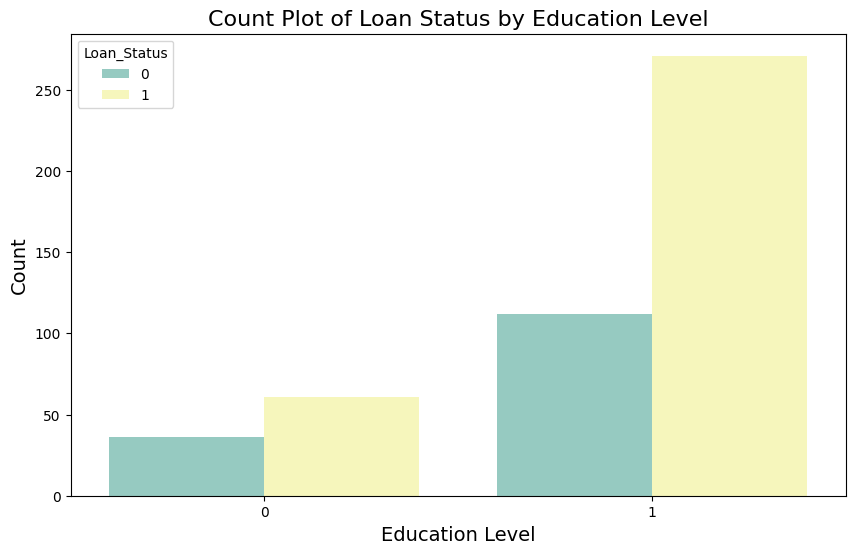

In [16]:
# Data Visualization : education & Loan Status
#Show the distribution of 'Loan_Status' within each category of 'Education'
plt.figure(figsize=(10, 6)) # set size
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset, palette='Set3')
# Set labels and title
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count Plot of Loan Status by Education Level', fontsize=16)

Text(0.5, 1.0, 'Count Plot of Loan Status by Marrial Situation')

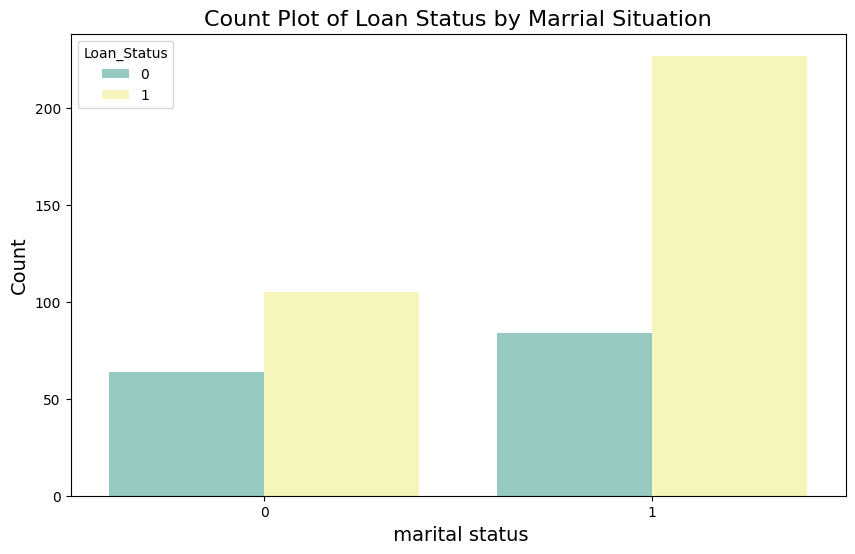

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset, palette='Set3')
plt.xlabel(' marital status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count Plot of Loan Status by Marrial Situation', fontsize=16)

Text(0.5, 1.0, 'Count Plot of Loan Status by  Employement status')

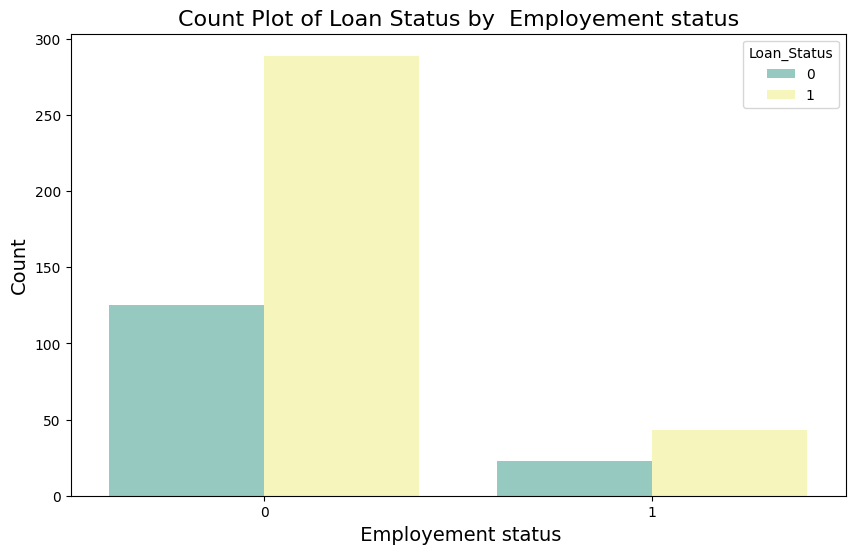

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset, palette='Set3')
plt.xlabel(' Employement status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count Plot of Loan Status by  Employement status', fontsize=16)

In [19]:
# MODEL TRAINING
#Split the Data into X & Y : data and label
# X --> features (input)  Y --> label (output)
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [20]:
#Train Test Split
# train_test_split ()-->  split a dataset into training and testing sets. 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [22]:
# Different types of Machine Learning Model 

In [23]:
#Logistic Regression (LR)
model = LogisticRegression(max_iter=1000)
#Train the model using the training data
model.fit(X_train,Y_train)
#print ("(X_test)" ,X_test.head())
lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', accuracy_score(lr_prediction,Y_test))

Logistic Regression accuracy =  0.8333333333333334


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print(classification_report(Y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



In [25]:

# Support Vector Machines (SVM)

svm_model = SVC(kernel='linear')
print("Fitting SVM model...")
svm_model.fit(X_train, Y_train)
svc_prediction = model.predict(X_test)
print('Support Vector Machines accuracy = ', accuracy_score(svc_prediction,Y_test))

Fitting SVM model...
Support Vector Machines accuracy =  0.8333333333333334


In [26]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_prediction = dt_model.predict(X_test)
dt_accuracy = accuracy_score(dt_prediction, Y_test)
print('Decision Tree accuracy = ', dt_accuracy)

print(classification_report(Y_test, dt_prediction))


Decision Tree accuracy =  0.7708333333333334
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.79      0.91      0.85        33

    accuracy                           0.77        48
   macro avg       0.74      0.69      0.70        48
weighted avg       0.76      0.77      0.76        48



In [27]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('logistic_regression_model.pkl', 'rb') as f:
    k = pickle.load(f)

In [28]:
cy = k.predict([[0, 0, 0, 0, 0, 0, 0, 0, 66660, 0, 0]])
print(cy)

[0]


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
